# In Depth Analysis of Gufhtugu Dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline

data = pd.read_csv('../input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv')
data.head()

,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 10:29,Karachi


## Data Preprocessing

Renaming the columns for ease in accessing the data

In [2]:
data = data.rename({"Order Number": "Order_Number", "Order Status": "Order_Status", "Book Name":"Book_Name",
                    "Order Date": "Order_Date", "City (Billing)": "City"}, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19187 entries, 0 to 19186
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order_Number  19187 non-null  int64 
 1   Order_Status  19187 non-null  object
 2   Book_Name     19185 non-null  object
 3   Order_Date    19187 non-null  object
 4   City          19186 non-null  object
dtypes: int64(1), object(4)
memory usage: 749.6+ KB


In [3]:
# Checking whether the Order_Numbers are duplicated or not. 
# If duplicates are present, then delete the duplicates
data.Order_Number.value_counts()

55816    2
65878    2
55966    1
53903    1
47762    1
        ..
50514    1
30281    1
62804    1
64853    1
32768    1
Name: Order_Number, Length: 19185, dtype: int64

In [4]:
# since the data included duplicates hence deleting the duplicates
data = data.drop_duplicates()
data.Order_Number.value_counts()

67583    1
49805    1
53903    1
47762    1
68244    1
        ..
50514    1
30281    1
62804    1
64853    1
32768    1
Name: Order_Number, Length: 19185, dtype: int64

## Order Status Frequency

In [5]:
print(data.Order_Status.value_counts())
print()

# Plotting the Order Status Frequency 
px.histogram(data, x = data.Order_Status, width = 400, height = 400, title='Order Status Frequency')

Completed    17894
Returned      1263
Canceled        28
Name: Order_Status, dtype: int64



## Most Selling Books

In [6]:
# Since the book names were separated by " / " that is why I used split method to get name of all the books separately
book_data = data.Book_Name.apply(lambda x: str(x).split('/'))
# Storing the list of lists book names in a list 'books' 
books = [item for sublist in book_data for item in sublist]
# creating a new dataframe 'df' for ease in plotting the books sold
df = pd.DataFrame(data = books, columns = ['Books_Sold'])
# Only storing the top 10 most selling books of all times and converting the result into a datafram
book_chart = df.Books_Sold.value_counts().nlargest(10).to_frame()
# Printing the most sold book name and its number of times it was sold
print(book_chart.head(1))
print()
# plotting 10 top selling books of all time
px.bar(book_chart, y = book_chart.Books_Sold, x = book_chart.index, title = 'Most Selling Books')

                        Books_Sold
انٹرنیٹ سے پیسہ کمائیں        3497



## Visualizing Orders Status Frequency by Time 

In [7]:
# The column 'Order_Date' had both time and date, for ease in data manipulation made new columns for both Time and Date
# "Order_Date" column had date and time separated by empty space, hence splitted the data and stored in respectice columns
data['Time'] = data.Order_Date.apply(lambda x: str(x).split(' ')[1])
data['Date'] = data.Order_Date.apply(lambda x: str(x).split(' ')[0])
data.head()

,Order_Number,Order_Status,Book_Name,Order_Date,City,Time,Date
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat,17:43,1/20/2021
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 13:37,Karachi,13:37,1/20/2021
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi,10:48,1/20/2021
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi,10:32,1/20/2021
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 10:29,Karachi,10:29,1/20/2021


In [8]:
# Converting time into mins by getting the hours by splitting and multiplying it by 60 
# and then adding it with the minutes to get the total minutes
mins = data.Time.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))
# cutting the Mins into 4 parts so that the each time can manipulated with a time range of 6 hours
pd.cut(mins, bins = 4)

0        (719.5, 1079.25]
1        (719.5, 1079.25]
2         (359.75, 719.5]
3         (359.75, 719.5]
4         (359.75, 719.5]
               ...       
19182    (719.5, 1079.25]
19183    (719.5, 1079.25]
19184    (719.5, 1079.25]
19185    (719.5, 1079.25]
19186    (719.5, 1079.25]
Name: Time, Length: 19185, dtype: category
Categories (4, interval[float64]): [(-1.439, 359.75] < (359.75, 719.5] < (719.5, 1079.25] < (1079.25, 1439.0]]

Converting Time Column into Categorical Variable for ease in manipulation

In [9]:
# Creating a new column Mins
data['Mins'] = mins
# if the number of mins are lesser than 360 i.e Time is from 00:00 to 05:59 store it as 0
data.loc[data['Mins'] < 360, 'Mins'] = 0
# if the number of mins are lesser than 720 and greater than equal to 360 
# i.e Time is from 06:00 to 11:59 store it as 1
data.loc[(data['Mins'] >= 360) & (data['Mins'] < 720), 'Mins'] = 1 
# if the number of mins are lesser than 1080 and greater than equal to 720
# i.e Time is from 12:00 to 17:59 store it as 2
data.loc[(data['Mins'] >= 720) & (data['Mins'] < 1080), 'Mins'] = 2 
# if the number of mins are  greater than equal to 1080
#i.e Time is from 18:00 to 23:59 store it as 3
data.loc[(data['Mins'] >= 1080), 'Mins'] = 3
# Checking in which time frame most orders are placed
data.Mins.value_counts()
# plotting the number of orders placed within different time frames
px.histogram(data, x = data.Mins, width = 400, height = 400, title='Order Status Frequency By Time')
# Most Orders are placed between 6 PM to 12 AM, with number of orders = 7010

### Order Completion Ratio by Time

Converting each time frame into a separate dataframe for analyzing the order statuses within every time frame

In [10]:
a = data.loc[data.Mins == 0].Order_Status.value_counts().to_frame()
b = data.loc[data.Mins == 1].Order_Status.value_counts().to_frame()
c = data.loc[data.Mins == 2].Order_Status.value_counts().to_frame()
d = data.loc[data.Mins == 3].Order_Status.value_counts().to_frame()

In [11]:
print('Ratio of Order Status from 12 AM to 6 AM:')
# Plotting the Order Status for orders placed between 12 AM to 6 AM
# normalizing the value_counts to see the percentage of each variable
print(data.loc[data.Mins == 0].Order_Status.value_counts(normalize = True)*100)
px.bar(a, y = a.Order_Status, x = a.index, title = 'Order Status from 12 AM to 6 AM', height = 400, width = 400)

Ratio of Order Status from 12 AM to 6 AM:
Completed    94.135667
Returned      5.514223
Canceled      0.350109
Name: Order_Status, dtype: float64


In [12]:
print('Ratio of Order Status from 6 AM to 12 PM:')
# Plotting the Order Status for orders placed between 12 AM to 6 AM
# normalizing the value_counts to see the percentage of each variable
print(data.loc[data.Mins == 1].Order_Status.value_counts(normalize = True)*100)
px.bar(b, y = b.Order_Status, x = b.index, title = 'Order Status from 6 AM to 12 PM', height = 400, width = 400 )

Ratio of Order Status from 6 AM to 12 PM:
Completed    92.947779
Returned      6.857003
Canceled      0.195217
Name: Order_Status, dtype: float64


In [13]:
print('Ratio of Order Status from 12 PM to 6 PM:')
print(data.loc[data.Mins == 2].Order_Status.value_counts(normalize = True)*100)
px.bar(c, y = c.Order_Status, x = c.index, title = 'Order Status from 12 PM to 6 PM', height = 400, width = 400 )

Ratio of Order Status from 12 PM to 6 PM:
Completed    93.145718
Returned      6.750691
Canceled      0.103591
Name: Order_Status, dtype: float64


In [14]:
print('Ratio of Order Status from 6 PM to 12 AM:')
print(data.loc[data.Mins == 1].Order_Status.value_counts(normalize = True)*100)
px.bar(d, y = d.Order_Status, x = d.index, title = 'Order Status from 6 PM to 12 AM', height = 400, width = 400 )

Ratio of Order Status from 6 PM to 12 AM:
Completed    92.947779
Returned      6.857003
Canceled      0.195217
Name: Order_Status, dtype: float64


## Identifying Cities with most orders

In [15]:
# Since the data contained names of cities in different cases, hence converted the all the data to lower case
data.City = data.City.apply(lambda x: str(x).lower())
# top 30 cities with most sales
cities = data.City.value_counts().nlargest(30).to_frame()
# list of top cities
top_cities = list(cities.index)
cities = cities.rename({'City': 'Sales'}, axis = 1)
# plotting the top cities by sales
px.bar(cities, x = cities.index, y = cities.Sales)

In [16]:
df = pd.DataFrame()
# Creating a new dataframe for visualizing the top 30 cities order statuses
df['Order_Status'] = data[data.City.isin(top_cities)].Order_Status
df['City'] = data[data.City.isin(top_cities)].City
df['Time'] = data[data.City.isin(top_cities)].Mins
df['Date'] = data[data.City.isin(top_cities)].Date

### Visualizing Order Completion Ratio for Cities with most sales

In [17]:
# creating a pivot table with index city, column Order status and populating the table with Time
pt = pd.pivot_table(df, values = 'Time', index = 'City', columns = 'Order_Status', aggfunc = 'count', fill_value=0)
# creating a column for finding out the ratio of 'Completed' (Order Status) orders 
pt['Completion_Rate'] = pt.Completed / (pt.Completed + pt.Canceled + pt.Returned)
pt = pt.sort_values(by = 'Completion_Rate', ascending = False)

Hence the City with Most Order Completion Rate is Dera Ghazi Khan

In [18]:
px.bar(pt, y = pt.Completion_Rate, x = pt.index, title = 'Order Completion of top 30 cities')

## Order Completion Ratio with Time Ranges

In [19]:
pt = pd.pivot_table(data, values = 'City', index = 'Mins', columns = 'Order_Status', aggfunc = 'count', fill_value=0)
pt['Completion_Rate'] = pt.Completed / (pt.Completed + pt.Canceled + pt.Returned)
pt = pt.sort_values(by = 'Completion_Rate', ascending = False)
px.bar(pt, y = pt.Completion_Rate, x = pt.index, title = 'Order Completion for Different Time Ranges')

The Rate of Completion of Orders are Maximum for orders placed between 12 AM to 6 AM.

## Order Completion Ratio by Different Dates

In [20]:
pt = pd.pivot_table(data, values = 'City', index = 'Date', columns = 'Order_Status', aggfunc = 'count', fill_value=0)
pt['Completion_Rate'] = pt.Completed / (pt.Completed + pt.Canceled + pt.Returned)
pt = pt.sort_values(by = 'Completion_Rate', ascending = False)
px.bar(pt, y = pt.Completion_Rate, x = pt.index, title = 'Order Completion for Different Dates')

From above graph we can determine the order placed on 19/11/2019 had least completion rate with 0.5

## Visualizing Months with most sales

In [21]:
# splitting the Date column for getting the months and days of each date
monthly = data.Date.apply(lambda x: x.split("/")[0])
daily = data.Date.apply(lambda x: x.split("/")[1])
data['Month'] = monthly
data['Day'] = daily

In [22]:
# Visualizing the month with most sales
pt = pd.pivot_table(data, values = 'Order_Number', index = 'Month', aggfunc = 'count')\
              .sort_values(by = 'Order_Number', ascending = False)
px.bar(pt, y = pt.Order_Number, x = pt.index, title = 'Number of Orders Placed in Different Months')
              

Most number of orders are placed in January with least orders placed in February

## Visualizing Days with most sales

In [23]:
pt = pd.pivot_table(data, values = 'Order_Number', index = 'Day', aggfunc = 'count').sort_values(by = 'Order_Number', ascending = False)
px.bar(pt, y = pt.Order_Number, x = pt.index, title = 'Number of Orders Placed in Different Days')

Most number of orders are placed on 9th Day of the month and least orders are placed in the 19th day of the month

## Time Series Forecasting for predicting the number of orders

In [24]:
# Creating a new pred_table
pred_table = data[['Date', 'Order_Number', 'Order_Status']]
# converting the Date column values to datetime and copying the data in the pred_table.Date
pred_table['Date'] = pd.to_datetime(data.Date.iloc[:])
# Grouping the pred_table with Date and calculating the number of orders placed within each date
pred_table = pred_table.groupby('Date')['Order_Number'].count().reset_index()
pred_table

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Order_Number
0,2019-10-03,9
1,2019-11-12,3
2,2019-11-13,3
3,2019-11-14,3
4,2019-11-15,2
...,...,...
404,2021-01-16,84
405,2021-01-17,37
406,2021-01-18,28
407,2021-01-19,20


## FB Prophet Library for predicting the sales for the next whole year

Text(0.5, 1.0, 'Book Sales')

<Figure size 864x432 with 0 Axes>

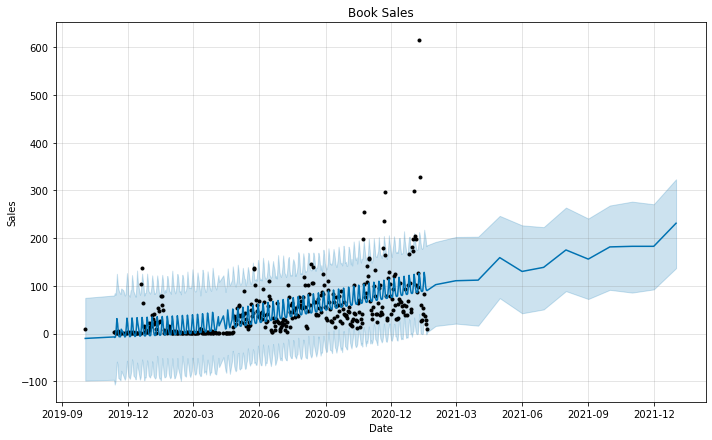

In [25]:
from fbprophet import Prophet
sales_pred = Prophet(interval_width = 0.95)
# renaming the columns, since fbpropher requires each column to be used to be renamed as ds and y
sales = pred_table.rename(columns={'Date': 'ds', 'Order_Number': 'y'})
# fitting the model
sales_pred.fit(sales)

# forecasting the number of sales for the next 12 Months
sales_forecast = sales_pred.make_future_dataframe(periods=12, freq='MS')
sales_forecast = sales_pred.predict(sales_forecast)

# visualizing the predictions
plt.figure(figsize=(12, 6))
sales_pred.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Book Sales')

### Result: The Book Sales are expected to grow within each month, with the number of sales crossing 300 per day after one year
The confidence interval upto 12 months remains constant

### If you like the notebook, give this notebook an upvote and let me know in the comments the part you cannot understand and the part where I can improve.
### Thank you. Happy Coding. 